In this assignment, we will examine polynomial interpolation and least square fitting of polynomials to a set of points.

Input: Suppose we have n points: $(t_1, y_1), (t_2, y_2), \ldots , (t_n, y_n)$.

#### **Import necessary packages:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### **A. Polynomial Interpolation:**
First, we would like to fit a polynomial of degree n-1 to the set of points, i.e. we will fit a polynomial:

$$p(t) = c_0 + c_1t + \cdots + c_{n−1}t^{n−1}$$

So that it goes through all the n points. Our task is to find the coefficient $c_0, c_1, \ldots , c_{n-1}$.

In this assignment $n=7$, we will fit a $6$-degree polynomial. The $7$ points are as follows:

$$(1, 4), (3, 7), (4, 2), (7, 2), (10, 5), (12, 10), (15, 4)$$

##### **Step 1: Set up the system of linear equations**
We can set up the system of equations $Ac=y$ to represent the n given conditions $p(t_i)=y_i$ that the polynomial must satisfy. Here, $c$ is the vector of coefficients and $y$ is the vectors of the $y_i$’s.  The matrix $A$ is called the Vandermonde matrix which represents the coefficients of the $n$ linear equations (linear in terms of the $c_i$’s).

☢ Long story huh..? 🤯 Let's go step by step. 🔽

⚡ From the given data point create two numpy array $t$ and $y$

⚡ Using $t$ create the vendermonde matrix. (How 🤔? You have go through your lecture first.)

**Hint: You can use `np.vander()` to create $A$. Saw the `numpy` documentation for more details.
 
That's all you have to do for this step. 👻


In [ ]:
# Write appropriate code
t = np.array([1,3,4,7,10,12,15])
y = np.array([4,7,2,2,5,10,4]) #y is the p(t) values

#print('t:',t)
#print('y:',y)
A = np.array([t**i for i in range(7)]).T
print(A)


[[       1        1        1        1        1        1        1]
 [       1        3        9       27       81      243      729]
 [       1        4       16       64      256     1024     4096]
 [       1        7       49      343     2401    16807   117649]
 [       1       10      100     1000    10000   100000  1000000]
 [       1       12      144     1728    20736   248832  2985984]
 [       1       15      225     3375    50625   759375 11390625]]


In [ ]:
#another way \\ doesnt work so dont use, TODO
b = np.array([t**0])

for i in range(1,7):
  b = np.concatenate((b,np.array([t**i])),axis=1)

print(b)

[[       1        1        1        1        1        1        1        1
         3        4        7       10       12       16        1        9
        16       49      100      144      256        1       27       64
       343     1000     1728     4096        1       81      256     2401
     10000    20736    65536        1      243     1024    16807   100000
    248832  1048576        1      729     4096   117649  1000000  2985984
  16777216]]


##### **Step 2: Find the coefficient vector $c$**
Since the Vandermonde matrix is invertible if $t_i ≠ t_j$, for $i ≠ j$ (see slide on inverses), we can simply find $c$ using `c = np.linalg.inv(A).dot(y)`. Of course, you can use the QR-decomposition of $A$ to find the inverse if you want.😜

In [ ]:
c = np.linalg.inv(A).dot(y)
print(c)

[-3.37575758e+01  6.28880231e+01 -3.12842232e+01  6.86690316e+00
 -7.52765753e-01  4.04882155e-02 -8.49767516e-04]


##### **Step 3: Plot the points and the polynomial**
⚡ Plot the given n points

⚡ Calculate the value of $p$ for new $t$ using coefficient vector $c$

⚡ Plot the polynomial

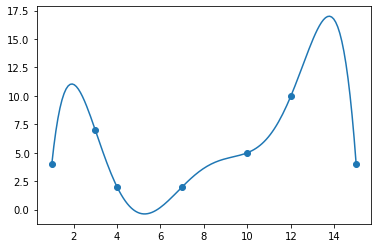

In [ ]:
#1
plt.scatter(t,y)
#2
t_new = np.linspace(1,15,150)
#p_new = c[0] + c[1]*t_new + c[2]*t_new**2 + c[3]*t_new**3+ c[4]*t_new**4+ c[5]*t_new**5 + c[6]*t_new**6
p_new = np.zeros(150) 

for i in range(7):
  p_new += c[i]*t_new**i 

plt.plot(t_new,p_new)
plt.show()


#### **B. Polynomial interpolation using two cubic polynomials:**
In this part, you we will fit the following two cubic polynomials $p(t)$ and $q(t)$ to the n points:

$$p(t) = c_0 + c_1 t + c_2 t^2 + c_3 t^3, q(t) = d_0 + d_1t + d_2 t^2 + d_3 t^3$$

that satisfies the following conditions:

$$p(1) = 4$$ 
$$p(3) = 7$$ 
$$p(4) =2$$
$$q(10) = 5$$ 
$$q(12) = 10$$ 
$$p(15) = 4$$
$$p(7) = q(7)$$ 
$$ p’(7) = q’(7)$$

**Note: $p’(7)$ and $q'(7)$ are the derivatives of $p(t)$ and $q(t)$ at $t = 7$ respectively

##### **Step 1: Set up the system of linear equations**
We can set up the system of equations $Ax=b$ to represent the given conditions that the polynomials must satisfy. Here, $x$ is the vector of coefficients:   

$$x=[c_0, c_1, c_2, c_3, d_0, d_1, d_2, d_3]$$

The matrix $A$ is called the Vandermonde matrix.

💥 Stucked again? Need hints?😲 Here you go: 🔽

⚡ From given conditions create three numpy array $p_t, q_t$ and $b$

⚡ Using $p_t, q_t$ and the conditions make the Vendermonde matrix $A$ (This is the tricky part. 👊)

**Hint: You can use `np.column_stack((..,..))` and `np.row_stack((..,..))` to creat matrix $A$. Saw the `numpy` documentation for more details.

In [ ]:
t = np.array([1,3,4,7,10,12,15])
y = np.array([4,7,2,2,5,10,4]) #y is the p(t) values

#print('t:',t)
#print('y:',y)
A = np.array([t**i for i in range(3)]).T
print(A)

[[  1   1   1]
 [  1   3   9]
 [  1   4  16]
 [  1   7  49]
 [  1  10 100]
 [  1  12 144]
 [  1  15 225]]


##### **Step 2: Find the coefficient vector $x$**
You have to find the coefficient vector $x$. This time find your way around, no hints from this side.🚸

##### **Step 3: Plot the points and the polynomials**
⚡ Plot the given points given in condition

⚡ Plot the polynomials

In [ ]:
# Write appropriate code

#### **C. Least-square polynomial fitting:**
Now we will fit a quadratic polynomial $p(t) = c_0 + c_1 t + c_2 t^2$ , to the $n = 7$ points. Of course, we do not require here that all the conditions will be satisfied. We wish to find a polynomial that minimized the sum of squared errors at each $t_i$.

##### **Step 1: Set up the system of linear equations**
Set up a system of equations $Ac = y$ that corresponds to the points. $Ac = y$, is unlikely to have a solution and so we aim to find $c$, that minimizes $∥ Ac − y ∥^2$.

In [ ]:
t = np.array([1,3,4,7,10,12,15])
y = np.array([4,7,2,2,5,10,4]) #y is the p(t) values

#print('t:',t)
#print('y:',y)
A = np.array([t**i for i in range(3)]).T
print(A)

m = (np.dot(A.T,A))
n = np.linalg.inv(m)
A_t = np.dot(n,A.T)
print(A_t)


[[  1   1   1]
 [  1   3   9]
 [  1   4  16]
 [  1   7  49]
 [  1  10 100]
 [  1  12 144]
 [  1  15 225]]
[[ 8.81354728e-01  3.75733716e-01  1.75082787e-01 -2.18231691e-01
  -2.98588707e-01 -1.78294794e-01  2.62943960e-01]
 [-2.13676611e-01 -3.77173908e-02  2.95618311e-02  1.48597945e-01
   1.43431731e-01  7.09862945e-02 -1.41183800e-01]
 [ 1.09222439e-02  6.08765272e-04 -3.24043149e-03 -9.55785165e-03
  -8.03001663e-03 -2.65298484e-03  1.19502755e-02]]


##### **Step 2: Find the coefficient vector $c$**
We find $c$ using $c = A^† y = (A^T A)^{−1} A^T y = R^{−1} Q^T y$, where $A = QR $ is the QR-decomposition of the matrix $A$. Numpy function `np.linalg.pinv(A)` gives you the pseudo-inverse $A^†$

In [ ]:
c = np.dot(A_t,y)
print("c\n",c)

c
 [3.84514148e+00 9.98777732e-02 3.47493640e-03]


##### **Step 3: Plot the points and the polynomial**
⚡ Plot the given points given in condition

⚡ Plot the polynomial

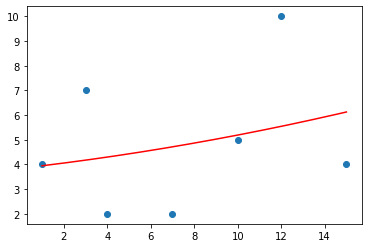

In [ ]:
plt.scatter(t,y)
t_new = np.linspace(1,15,150)
p_new = np.zeros(150) 

for i in range(3):
  p_new += c[i]*t_new**i 

plt.plot(t_new,p_new,color='r')
plt.show()
